In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'

In [2]:
# %%bash
# cd hardware/victims/firmware/
# # mkdir -p simpleserial-nn && cp -r neuralnetwork/* $_
# cd simpleserial-nn

In [3]:
%%bash -s "$PLATFORM"
cd hardware/victims/firmware/simpleserial-nn
make PLATFORM=$1 CRYPTO_TARGET=NONE

SS_VER set to SS_VER_1_1
C:/Users/parth/CHIPWH~1/cw/home/portable/avrgcc/bin/make clean_objs .dep 
make[1]: Entering directory 'C:/Users/parth/ChipWhisperer5_64/cw/home/portable/chipwhisperer/hardware/victims/firmware/simpleserial-nn'
SS_VER set to SS_VER_1_1
rm -f -- simpleserial-base-CWLITEARM.hex
rm -f -- simpleserial-base-CWLITEARM.eep
rm -f -- simpleserial-base-CWLITEARM.cof
rm -f -- simpleserial-base-CWLITEARM.elf
rm -f -- simpleserial-base-CWLITEARM.map
rm -f -- simpleserial-base-CWLITEARM.sym
rm -f -- simpleserial-base-CWLITEARM.lss
rm -f -- objdir-CWLITEARM/*.o
rm -f -- objdir-CWLITEARM/*.lst
rm -f -- simpleserial-base.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s
rm -f -- simpleserial-base.d simpleserial.d stm32f3_hal.d stm32f3_hal_lowlevel.d stm32f3_sysmem.d
rm -f -- simpleserial-base.i simpleserial.i stm32f3_hal.i stm32f3_hal_lowlevel.i stm32f3_sysmem.i
make[1]: '.dep' is up to date.
make[1]: Leaving directory 'C:/Users/parth/ChipWhisperer5_64/cw/ho

simpleserial-base.c: In function 'get_pt':
simpleserial-base.c:81:11: warning: unused variable 'ans' [-Wunused-variable]
   81 |     float ans = avgError(xdata,ydata,n,m,c);
      |           ^~~


In [4]:
import chipwhisperer as cw
try:
    if not scope.connectStatus:
        scope.con()
except NameError:
    scope = cw.scope()
   
try:
    target = cw.target(scope)
except IOError:
    print("INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.")
    print("INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.")
    scope = cw.scope()
    target = cw.target(scope)

print("INFO: Found ChipWhisperer😍")

if "STM" in PLATFORM or PLATFORM == "CWLITEARM" or PLATFORM == "CWNANO":
    prog = cw.programmers.STM32FProgrammer
elif PLATFORM == "CW303" or PLATFORM == "CWLITEXMEGA":
    prog = cw.programmers.XMEGAProgrammer
else:
    prog = None
    
import time
time.sleep(0.05)
scope.default_setup()
def reset_target(scope):
    if PLATFORM == "CW303" or PLATFORM == "CWLITEXMEGA":
        scope.io.pdic = 'low'
        time.sleep(0.05)
        scope.io.pdic = 'high_z' #XMEGA doesn't like pdic driven high
        time.sleep(0.05)
    else:  
        scope.io.nrst = 'low'
        time.sleep(0.05)
        scope.io.nrst = 'high_z'
        time.sleep(0.05)

(ChipWhisperer NAEUSB WARNING|File naeusb.py:701) Your firmware (0.30) is outdated - latest is 0.62See https://chipwhisperer.readthedocs.io/en/latest/firmware.html for more information


INFO: Found ChipWhisperer😍


In [5]:
cw.program_target(scope, prog, "hardware/victims/firmware/simpleserial-nn/simpleserial-base-{}.hex".format(PLATFORM))

Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11843 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11843 bytes


In [6]:
def capture_trace(_ignored=None):
    ktp = cw.ktp.Basic()
    key, text = ktp.next()
    return cw.capture_trace(scope, target, text).wave

In [9]:
wave = capture_trace()
print("😍ok to continue")

(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:640) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 0f
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:640) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 0e
(ChipWhisperer Scope WARNING|File __init__.py:452) Timeout happened during capture


AttributeError: 'NoneType' object has no attribute 'wave'

In [94]:
import pandas as pd

df = pd.DataFrame(wave)
df.to_csv('SVM.csv')

<IPython.core.display.Javascript object>


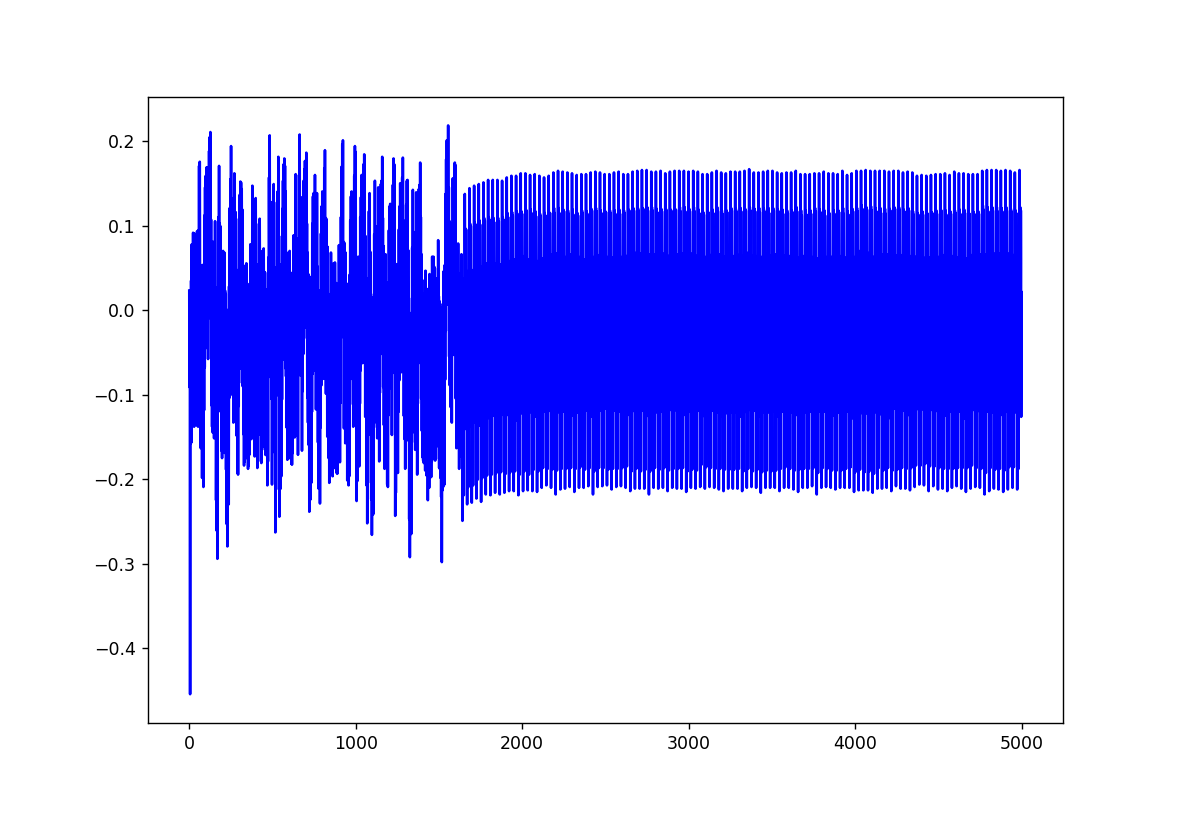

In [8]:
%matplotlib notebook
import matplotlib.pylab as plt
#plt.style.use('white_background')
plt.figure()
plt.plot(wave, 'b')
plt.show()

In [12]:
wave.shape

(5000,)

In [13]:
min(wave)

-0.4658203125

In [14]:
max(wave)

0.2314453125